# Importing needed libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import numpy as np

# Importing Data

In [2]:
#Importing data
pdf1990 = pd.read_excel('./../Data sets/Census 1990.xlsx')

In [3]:
#Info about rows and columns
pdf1990.shape

#Changing the number of rows displayed
pd.set_option('display.max_rows', None)

#displaying first 5 rows
pdf1990.head()


,Unnamed: 0,Social Explorer - Census 1990,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Statistics,"Tract 9, Hamilton County, Ohio",NaN,"Tract 10, Hamilton County, Ohio",NaN,"Tract 16, Hamilton County, Ohio",NaN,"Tract 17, Hamilton County, Ohio",NaN,TOTAL (All Selected Census Tracts),NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SE:T1. Total Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Total Population,2614,NaN,1594,NaN,2312,NaN,1861,NaN,8381,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning data

In [4]:
#Removing rows with all NaN values 
pdf1990 = pdf1990.dropna(subset=["Unnamed: 0"])
pdf1990 = pdf1990.dropna(subset=["Social Explorer - Census 1990"])

# Replacing NaN by 0s
pdf1990 = pdf1990.fillna(0)

#Dropping first row
pdf1990 = pdf1990.drop([0])

#Showing a list of columns names
list(pdf1990)

['Unnamed: 0',
 'Social Explorer - Census 1990',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10']

In [5]:
#Renaming columns
pdf1990.columns = ['Category',
                   'Census Tract 9, Hamilton County, Ohio',
                   'Census Tract 9, Percentage',
                   'Census Tract 10, Hamilton County, Ohio',
                   'Census Tract 10, Percentage',
                   'Census Tract 16, Hamilton County, Ohio',
                   'Census Tract 16, Percentage',
                   'Census Tract 17, Hamilton County, Ohio',
                   'Census Tract 17, Percentage',
                   'TOTAL (All Selected Census Tracts)',
                   'TOTAL Percentage']

In [6]:
#Removing columns I dont want
for col in pdf1990.columns:
    if 'Percentage' in col:
        del pdf1990[col]
             

In [7]:
#Obtaining index values of all the rows
pdf1990.index.values


#Removing all the rows I don't want
pdf1990 = pdf1990.drop([3,   6,   7,   8,  11,  12,  13,  16,  17,  18,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  59,  60,  61,  62,  63,  64,  65,  66,  67,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        86,  87,  88,  89,  90,  91,  94,  95,  96,  97,  98,  99, 102,
       103, 106, 107, 108, 111, 114, 117, 120, 121, 122, 125, 126, 127,
       130, 131, 132, 133, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 150, 153, 154, 155, 156, 157, 158, 159, 160, 163,
       166, 169, 172, 173, 174, 175, 176, 177, 178, 179, 180, 183, 184,
       187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 200, 201,
       202, 203, 204, 205, 206, 209, 210, 211, 212, 213, 216, 217, 218,
       219, 220])

In [8]:
#Changing the data to floats
pdf1990 = pdf1990.astype({'Census Tract 9, Hamilton County, Ohio': np.float64, 'Census Tract 10, Hamilton County, Ohio':np.float64,
                          'Census Tract 16, Hamilton County, Ohio':np.float64,'Census Tract 17, Hamilton County, Ohio':np.float64,
                          'TOTAL (All Selected Census Tracts)':np.float64})

#Checking if data are floats now
pdf1990.dtypes

Category                                   object
Census Tract 9, Hamilton County, Ohio     float64
Census Tract 10, Hamilton County, Ohio    float64
Census Tract 16, Hamilton County, Ohio    float64
Census Tract 17, Hamilton County, Ohio    float64
TOTAL (All Selected Census Tracts)        float64
dtype: object

In [9]:
pdf1990

,Category,"Census Tract 9, Hamilton County, Ohio","Census Tract 10, Hamilton County, Ohio","Census Tract 16, Hamilton County, Ohio","Census Tract 17, Hamilton County, Ohio",TOTAL (All Selected Census Tracts)
36,Persons:,2614.0,1594.0,2312.0,1861.0,8381.0
37,White,765.0,828.0,472.0,403.0,2468.0
38,Black,1820.0,746.0,1817.0,1447.0,5830.0
39,"American Indian, Eskimo, or Aleut",22.0,5.0,8.0,3.0,38.0
40,Asian or Pacific Islander,1.0,15.0,3.0,3.0,22.0
41,Other race,6.0,0.0,12.0,5.0,23.0


# Creating visualizations

<AxesSubplot:xlabel='Category'>

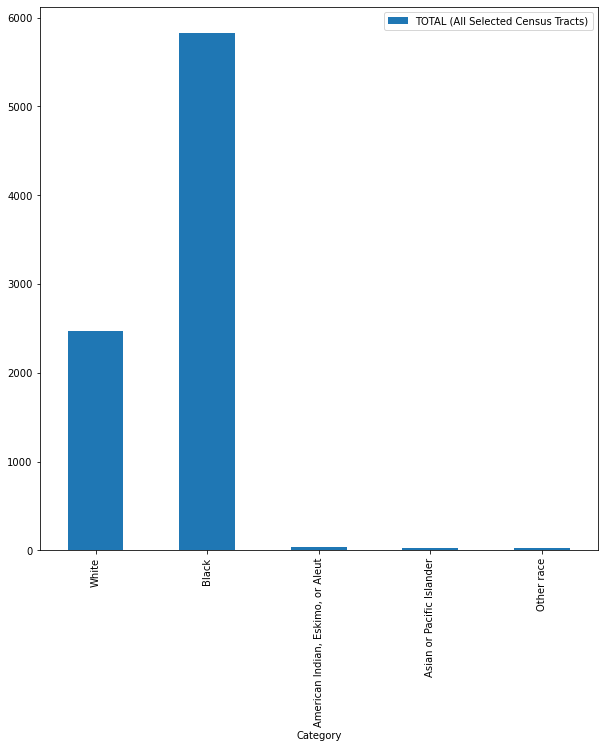

In [10]:
# Total white and Black population of OTR 
pdf1990.iloc[1:6].plot.bar(x = 'Category', y = 'TOTAL (All Selected Census Tracts)', figsize=(10,10))

In [11]:
pdf1990.to_pickle('pdf1990.pkl')